# More Pandas
v.ekc

We are going to continue exploring the dataset of global earthquakes. We will continue slicing DataFrames so that you can get any subset you want! — by data type, by condition, by label — and even do math across entire DataFrames at once. Lastly we will also cover quick plots with Pandas.

**Sections:**
1. Setup & Data
2. Selecting Columns by Data Type
3. Filtering Rows with Boolean Indexing
4. Additional Column-Filtering Methods
5. Broadcasting & Elementwise Arithmetic
6. MultiIndex DataFrames
7. Quick Plots with Pandas

---
## 1. Setup & Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the earthquakes dataset
df = pd.read_csv('earthquakes.csv')
df.head(2)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...


---
## 2. Selecting Columns by Data Type: `select_dtypes()`

Sometimes you want only the numeric columns, or only the text columns — without listing them all by name. 

#### `select_dtypes()` quick reference

| Argument | What you get |
|---|---|
| `object` | String / text columns |
| `int` | Integer columns only |
| `float` | Float columns only |
| `'number'` | All numeric columns (int + float) |
| `bool` | Boolean columns |

In [3]:
# Select all columns with object (string) datatypes
df.select_dtypes(object)

,alert,code,detail,ids,magType,net,place,sources,status,title,type,types,url
0,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389218,",ml,ci,"9km NE of Aguanga, CA",",ci,",automatic,"M 1.4 - 9km NE of Aguanga, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389202,",ml,ci,"9km NE of Aguanga, CA",",ci,",automatic,"M 1.3 - 9km NE of Aguanga, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389194,",ml,ci,"8km NE of Aguanga, CA",",ci,",automatic,"M 3.4 - 8km NE of Aguanga, CA",earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci37389186,",ml,ci,"9km NE of Aguanga, CA",",ci,",automatic,"M 0.4 - 9km NE of Aguanga, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,",nc73096941,",md,nc,"10km NW of Avenal, CA",",nc,",automatic,"M 2.2 - 10km NW of Avenal, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,73086771,https://earthquake.usgs.gov/fdsnws/event/1/que...,",nc73086771,",md,nc,"9km ENE of Mammoth Lakes, CA",",nc,",reviewed,"M 0.6 - 9km ENE of Mammoth Lakes, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
9328,NaN,38063967,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci38063967,",ml,ci,"3km W of Julian, CA",",ci,",reviewed,"M 1.0 - 3km W of Julian, CA",earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",https://earthquake.usgs.gov/earthquakes/eventp...
9329,NaN,2018261000,https://earthquake.usgs.gov/fdsnws/event/1/que...,",pr2018261000,",md,pr,"35km NNE of Hatillo, Puerto Rico",",pr,",reviewed,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",earthquake,",geoserve,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
9330,NaN,38063959,https://earthquake.usgs.gov/fdsnws/event/1/que...,",ci38063959,",ml,ci,"9km NE of Aguanga, CA",",ci,",reviewed,"M 1.1 - 9km NE of Aguanga, CA",earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",https://earthquake.usgs.gov/earthquakes/eventp...


In [4]:
# Select all columns with integer datatypes
df.select_dtypes(int)

,sig,time,tsunami,updated
0,28,1539475168010,0,1539475395144
1,26,1539475129610,0,1539475253925
2,192,1539475062610,0,1539536756176
3,3,1539474978070,0,1539475196167
4,72,1539474716050,0,1539477547926
...,...,...,...,...
9327,6,1537230228060,0,1537285598315
9328,15,1537230135130,0,1537276800970
9329,89,1537229908180,0,1537243777410
9330,19,1537229545350,0,1537230211640


In [5]:
# Select ALL numeric columns (int + float)
df.select_dtypes('number')

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
0,NaN,0.008693,NaN,85.0,1.35,NaN,26.0,0.19,28,1539475168010,0,-480.0,1539475395144
1,NaN,0.020030,NaN,79.0,1.29,NaN,20.0,0.29,26,1539475129610,0,-480.0,1539475253925
2,4.4,0.021370,28.0,21.0,3.42,NaN,111.0,0.22,192,1539475062610,0,-480.0,1539536756176
3,NaN,0.026180,NaN,39.0,0.44,NaN,26.0,0.17,3,1539474978070,0,-480.0,1539475196167
4,NaN,0.077990,NaN,192.0,2.16,NaN,18.0,0.05,72,1539474716050,0,-480.0,1539477547926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,0.018060,NaN,185.0,0.62,NaN,13.0,0.03,6,1537230228060,0,-480.0,1537285598315
9328,NaN,0.030410,NaN,50.0,1.00,NaN,28.0,0.21,15,1537230135130,0,-480.0,1537276800970
9329,NaN,0.452600,NaN,276.0,2.40,NaN,9.0,0.41,89,1537229908180,0,-240.0,1537243777410
9330,NaN,0.018650,NaN,61.0,1.10,NaN,27.0,0.10,19,1537229545350,0,-480.0,1537230211640


---
## 3. Filtering Rows with Boolean Indexing

Again, we can create a mask, a **boolean Series**, into `df[...]` or `df.loc[...]` to keep only the rows where the condition is `True`.

We can create a mask using:
- inequality conditions
-  more complex conditions
- 😈 regex to match patterns in string elements 😈
- numeric elements that are between a range
- categorical elements that are in a chosen list

| Goal | Syntax |
|---|---|
| Single numeric condition | `df[df['col'] >= value]` |
| OR condition | `df[(cond1) \| (cond2)]` |
| AND condition | `df[(cond1) & (cond2)]` |
| String match (exact) | `df[df['col'].str.contains('text')]` |
| 😈String match (regex) | `df[df['col'].str.contains('pat', regex=True)]` |
| Numeric range | `df[df['col'].between(a, b, inclusive='both')]` |
| Match a list of objects | `df[df['col'].isin(['a', 'b'])]` |

In [6]:
# This tempting syntax does NOT work — you can't compare a column name to a number
# df['mag' >= 7]

In [7]:
# Correct: keep only rows where magnitude >= 7
df[df['mag'] >= 7]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
837,green,4.1,1000haa3,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.763,3.0,14.0,",us1000haa3,pt18283003,at00pgehsk,",7.0,mww,...,",us,pt,at,",reviewed,1539204500290,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",600.0,1539378744253,https://earthquake.usgs.gov/earthquakes/eventp...
5263,red,8.4,1000h3p4,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.589,18.0,27.0,",us1000h3p4,us1000h4p4,",7.5,mww,...,",us,us,",reviewed,1538128963480,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0,1539123134531,https://earthquake.usgs.gov/earthquakes/eventp...


In [8]:
# Multiple conditions with | (OR) and & (AND)
# Select specific columns for earthquakes with mag >= 7 OR that caused a tsunami
df.loc[
    (df.tsunami == 1) | (df.mag >= 7),
    ['mag', 'title', 'tsunami', 'place']
].head(3)

,mag,title,tsunami,place
36,5.0,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,"165km NNW of Flying Fish Cove, Christmas Island"
118,6.7,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,"262km NW of Ozernovskiy, Russia"
501,5.6,"M 5.6 - 128km SE of Kimbe, Papua New Guinea",1,"128km SE of Kimbe, Papua New Guinea"


In [9]:
# str.contains() filters string columns — how many quakes are in California?
df.loc[
    (df.place.str.contains('California')),
    ['mag', 'title', 'tsunami', 'place']
].shape

(124, 4)

In [10]:
# str.contains() also supports regex — USGS uses both 'CA' and 'California'
CA_df = df.loc[
    (df.place.str.contains('CA|California', regex=True)),
    ['mag', 'title', 'tsunami', 'place']
]
CA_df.shape

(2861, 4)

In [11]:
# Combining row filter (regex) with column filter (list comprehension)
df.loc[
    (df.place.str.contains('CA|California', regex=True)),
    [col for col in df.columns if 'mag' in col]
].head(3)

,mag,magType
0,1.35,ml
1,1.29,ml
2,3.42,ml


In [12]:
# Same thing, using df.columns.str.contains() for the column selector
df.loc[
    (df.place.str.contains('CA|California', regex=True)),
    df.columns.str.contains('.*mag.*', regex=True)
]

,mag,magType
0,1.35,ml
1,1.29,ml
2,3.42,ml
3,0.44,ml
4,2.16,md
...,...,...
9326,1.82,ml
9327,0.62,md
9328,1.00,ml
9330,1.10,ml


In [13]:
# .between() filters a numeric column to a range (inclusive on both ends)
df.loc[df.mag.between(6.5, 7.5), ['mag','magType','title','tsunami','type']]

,mag,magType,title,tsunami,type
118,6.7,mww,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,earthquake
799,6.5,mww,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,earthquake
837,7.0,mww,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake
4363,6.7,mww,"M 6.7 - 263km NNE of Ndoi Island, Fiji",1,earthquake
5263,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [14]:
# .isin() keeps rows where a column value matches any item in a list
df.loc[df.magType.isin(['mw','mwb']), ['mag','magType','title','tsunami','type']]

,mag,magType,title,tsunami,type
995,3.35,mw,"M 3.4 - 9km WNW of Cobb, CA",0,earthquake
1465,3.83,mw,"M 3.8 - 109km WNW of Trinidad, CA",0,earthquake
2414,3.83,mw,"M 3.8 - 5km SW of Tres Pinos, CA",1,earthquake
4988,4.41,mw,"M 4.4 - 1km SE of Delta, B.C., MX",1,earthquake
6307,5.80,mwb,"M 5.8 - 297km NNE of Ndoi Island, Fiji",0,earthquake
8257,5.70,mwb,"M 5.7 - 175km SSE of Lambasa, Fiji",0,earthquake


### ✏️ Check-in 1

Using the earthquakes DataFrame:

1. How many earthquakes had **magnitude between 5.0 and 6.0** (inclusive)?
2. Filter to show only earthquakes that are in **Oregon** (the `place` column may say `'OR'` or `'Oregon'` — use regex). Return the Oregon earthquakes and the features `['mag','title','place']`

In [15]:
# 1. Magnitude between 5.0 and 6.0


In [16]:
# 2. Oregon earthquakes (regex)


#### Answer

In [17]:
# 1.
df[df.mag.between(5.0, 6.0)].shape[0]

143

In [18]:
# 2.
df.loc[df.place.str.contains('OR|Oregon', regex=True), ['mag','title','place']]

,mag,title,place
482,1.71,"M 1.7 - 15km S of Estacada, Oregon","15km S of Estacada, Oregon"
564,1.94,"M 1.9 - 3km SE of Umatilla, Oregon","3km SE of Umatilla, Oregon"
1004,1.06,"M 1.1 - 22km E of Mount Hood Village, Oregon","22km E of Mount Hood Village, Oregon"
1066,1.99,"M 2.0 Explosion - 5km W of Prineville, Oregon","5km W of Prineville, Oregon"
1436,1.23,"M 1.2 - 19km ENE of Springfield, Oregon","19km ENE of Springfield, Oregon"
2167,4.30,"M 4.3 - 290km WNW of Bandon, Oregon","290km WNW of Bandon, Oregon"
2776,0.74,"M 0.7 - 22km E of Mount Hood Village, Oregon","22km E of Mount Hood Village, Oregon"
2979,1.79,"M 1.8 Explosion - 11km SE of Molalla, Oregon","11km SE of Molalla, Oregon"
4113,2.99,"M 3.0 - 3km SSE of Brookings, Oregon","3km SSE of Brookings, Oregon"
5076,0.96,"M 1.0 Explosion - 24km SE of Sweet Home, Oregon","24km SE of Sweet Home, Oregon"


---
## 4. Additional Column-Filtering Methods

Beyond selecting specific column names, Pandas gives us `drop()` and `filter()` to remove or select columns by name or pattern — without modifying the original DataFrame.

>**NOTE:** `drop()` and `filter()` both return **a new DataFrame** — they don't change `df`.
>
>Use `df.drop/filter(columns=list_of_col_to_drop, inplace=True)` or reassign (`df = df.drop(...)`) if you want to keep the change!

In [19]:
df.shape

(9332, 26)

In [20]:
# Drop one column by name
df.drop(columns='ids').shape

(9332, 25)

In [21]:
# Drop multiple columns at once
df.drop(columns=['ids', 'detail']).shape

(9332, 24)

In [22]:
# Keep only columns whose names match a regex pattern
df.filter(regex='.*mag.*')

,mag,magType
0,1.35,ml
1,1.29,ml
2,3.42,ml
3,0.44,ml
4,2.16,md
...,...,...
9327,0.62,md
9328,1.00,ml
9329,2.40,md
9330,1.10,ml


In [23]:
# Neither drop() nor filter() modifies the original — check:
df.shape

(9332, 26)

---
## 5. Broadcasting & Elementwise Arithmetic

Just like NumPy, Pandas supports **broadcasting**: applying a single value (or Series) across an entire DataFrame or Series.

Arithmetic between DataFrames lines up on **labels** (not position), which can cause `NaN` if labels don't match.

In [24]:
# Broadcast a scalar across a Series
df.mag * 3

0        4.05
1        3.87
2       10.26
3        1.32
4        6.48
        ...  
9327     1.86
9328     3.00
9329     7.20
9330     3.30
9331     1.98
Name: mag, Length: 9332, dtype: float64

In [25]:
# Broadcast a scalar across multiple columns
df[['mag','gap']] * 3

,mag,gap
0,4.05,255.0
1,3.87,237.0
2,10.26,63.0
3,1.32,117.0
4,6.48,576.0
...,...,...
9327,1.86,555.0
9328,3.00,150.0
9329,7.20,828.0
9330,3.30,183.0


Example of arithmetic lining up with the row labels, not index position value :|

In [26]:
# Two DataFrames with partially overlapping labels
df1 = pd.DataFrame({'A':[1,2,3], 'B':[3,4,5], 'C':[5,6,7]})
df2 = pd.DataFrame({'B':[5,6,7], 'C':[7,8,9], 'D':[9,10,11]}, index=[1,2,3])

In [27]:
df1

,A,B,C
0,1,3,5
1,2,4,6
2,3,5,7


In [28]:
df2

,B,C,D
1,5,7,9
2,6,8,10
3,7,9,11


In [29]:
# Elementwise arithmetic aligns on LABELS — mismatches become NaN

print(df1)
print('\n')
print(df2)
print('\n')

df1 + df2

   A  B  C
0  1  3  5
1  2  4  6
2  3  5  7


   B  C   D
1  5  7   9
2  6  8  10
3  7  9  11




,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,9.0,13.0,NaN
2,NaN,11.0,15.0,NaN
3,NaN,NaN,NaN,NaN


In [30]:
# A Series with matching column labels acts like a row (broadcasts row-wise)
srs = pd.Series([1,2,3], index=['A','B','C'])

print(df1)
print('\n')
print(srs)
print('\n')

df1 + srs

   A  B  C
0  1  3  5
1  2  4  6
2  3  5  7


A    1
B    2
C    3
dtype: int64




,A,B,C
0,2,5,8
1,3,6,9
2,4,7,10


In [31]:
# Without matching labels, we get NaN everywhere
srs_unlabeled = pd.Series([1,2,3])

print(df1)
print('\n')
print(srs_unlabeled)
print('\n')
df1 + srs_unlabeled

   A  B  C
0  1  3  5
1  2  4  6
2  3  5  7


0    1
1    2
2    3
dtype: int64




,A,B,C,0,1,2
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# To broadcast column-wise (along axis=0), use the arithmetic method with axis=0
print(df1)
print('\n')
print(srs_unlabeled)
print('\n')

df1.add(srs_unlabeled, axis=0)

   A  B  C
0  1  3  5
1  2  4  6
2  3  5  7


0    1
1    2
2    3
dtype: int64




,A,B,C
0,2,4,6
1,4,6,8
2,6,8,10


### Arithmetic alignment rules

| Situation | Result |
|---|---|
| `df * scalar` | Scalar applied to every element |
| `df1 + df2` (same labels) | Elementwise addition, aligned by label |
| `df1 + df2` (different labels) | `NaN` where labels don't match |
| `df + series` (matching column labels) | Series broadcast **row-wise** |
| `df.add(series, axis=0)` | Series broadcast column-wise |

### ✏️ Check-in 2

The earthquake magnitude scale is logarithmic — each whole number step is 10× more powerful.

1. Create a new column `mag_energy` that represents a *very rough* energy estimate: `10 ** df['mag']`. *(Broadcasting!)*
2. What are the ratioz of the earthquale magnitude to smallest magnitude in the California subset (`CA_df`)? What is the largest ratio?

In [33]:
# 1. Create mag_energy column


In [34]:
# 2. Magnitude ratio in CA_df


#### Hint:

Use broadcasting to compute `CA_df.mag / CA_df.mag.min()`.

#### Answer

In [35]:
# 1.
df['mag_energy'] = 10 ** df['mag']
df[['mag','mag_energy']].head()

,mag,mag_energy
0,1.35,22.387211
1,1.29,19.498446
2,3.42,2630.267992
3,0.44,2.754229
4,2.16,144.543977


In [36]:
# 2.
cali_df.mag / cali_df.mag.min()

NameError: name 'cali_df' is not defined

---
## 6. Multi-Index DataFrames

A **MultiIndex** lets you use two (or more) columns as a hierarchical row index. This makes filtering by nested groups much cleaner.

We'll use the Olympics dataset to illustrate — filtering by **Team** and **Year** simultaneously.

In [37]:
# Regular DataFrame
olympics = pd.read_csv('athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# Without MultiIndex: boolean filtering to get US, 2012
olympics[(olympics.Team == 'United States') & (olympics.Year == 2012)]

In [39]:
# With MultiIndex: set Team and Year as the index at read time
multi_olympics = pd.read_csv('athlete_events.csv', index_col=['Team','Year'])
multi_olympics.head()

ID                      Name Sex   Age  Height  Weight  \
Team           Year                                                           
China          1992   1                 A Dijiang   M  24.0   180.0    80.0   
               2012   2                  A Lamusi   M  23.0   170.0    60.0   
Denmark        1920   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
Denmark/Sweden 1900   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
Netherlands    1988   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   

                     NOC        Games  Season       City          Sport  \
Team           Year                                                       
China          1992  CHN  1992 Summer  Summer  Barcelona     Basketball   
               2012  CHN  2012 Summer  Summer     London           Judo   
Denmark        1920  DEN  1920 Summer  Summer  Antwerpen       Football   
Denmark/Sweden 1900  DEN  1900 Summer  Summer      Paris     Tug-Of-War   
Netherlands    1988  NED  1988 Winter  Winter    Calgary  Speed Skating   

                                                Event Medal  
Team           Year                                          
China          1992       Basketball Men's Basketball   NaN  
               2012      Judo Men's Extra-Lightweight   NaN  
Denmark        1920           Football Men's Football   NaN  
Denmark/Sweden 1900       Tug-Of-War Men's Tug-Of-War  Gold  
Netherlands    1988  Speed Skating Women's 500 metres   NaN

In [41]:
# Now indexing is clean: (outer_level, inner_level)
multi_olympics.loc['United States', 2012][multi_olympics.Season=='Summer']

ID                               Name Sex   Age  \
Team          Year                                                        
United States 2012     256        Abdihakim "Abdi" Abdirahman   M  35.0   
              2012     737  Amelia Lynn "Amy" Acuff (-Harvey)   F  37.0   
              2012     811   Natalie Cammile Adams (-Brannan)   F  20.0   
              2012    1017             Nathan Ghar-Jun Adrian   M  23.0   
              2012    1017             Nathan Ghar-Jun Adrian   M  23.0   
...                    ...                                ...  ..   ...   
              2012  134271                      Sarah Zelenka   F  25.0   
              2012  134388                Julie Ashley Zetlin   F  22.0   
              2012  134508                     Lily Ann Zhang   F  16.0   
              2012  134508                     Lily Ann Zhang   F  16.0   
              2012  134938                 Kate Marie Ziegler   F  24.0   

                    Height  Weight  NOC        Games  Season    City  \
Team          Year                                                     
United States 2012   178.0    61.0  USA  2012 Summer  Summer  London   
              2012   188.0    66.0  USA  2012 Summer  Summer  London   
              2012   173.0    65.0  USA  2012 Summer  Summer  London   
              2012   198.0   100.0  USA  2012 Summer  Summer  London   
              2012   198.0   100.0  USA  2012 Summer  Summer  London   
...                    ...     ...  ...          ...     ...     ...   
              2012   183.0    77.0  USA  2012 Summer  Summer  London   
              2012   168.0    55.0  USA  2012 Summer  Summer  London   
              2012   166.0    58.0  USA  2012 Summer  Summer  London   
              2012   166.0    58.0  USA  2012 Summer  Summer  London   
              2012   183.0    73.0  USA  2012 Summer  Summer  London   

                                  Sport  \
Team          Year                        
United States 2012            Athletics   
              2012            Athletics   
              2012             Swimming   
              2012             Swimming   
              2012             Swimming   
...                                 ...   
              2012               Rowing   
              2012  Rhythmic Gymnastics   
              2012         Table Tennis   
              2012         Table Tennis   
              2012             Swimming   

                                                            Event   Medal  
Team          Year                                                         
United States 2012                       Athletics Men's Marathon     NaN  
              2012                    Athletics Women's High Jump     NaN  
              2012          Swimming Women's 200 metres Butterfly     NaN  
              2012            Swimming Men's 100 metres Freestyle    Gold  
              2012  Swimming Men's 4 x 100 metres Freestyle Relay  Silver  
...                                                           ...     ...  
              2012                   Rowing Women's Coxless Pairs     NaN  
              2012         Rhythmic Gymnastics Women's Individual     NaN  
              2012                   Table Tennis Women's Singles     NaN  
              2012                      Table Tennis Women's Team     NaN  
              2012          Swimming Women's 800 metres Freestyle     NaN  

[669 rows x 13 columns]

In [ ]:
# Now indexing is clean: (outer_level, inner_level)
#   grab just the `Age` column!
multi_olympics.loc['United States', 2012]['Age'].mean()

In [45]:
# First level only (all years for a team)
multi_olympics.loc['United States']


,ID,Name,Sex,Age,Height,Weight,NOC,Games,Season,City,Sport,Event,Medal
Year,,,,,,,,,,,,,
1992,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
1992,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
1992,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
1992,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
1994,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,135458,Rami Zur,M,27.0,175.0,77.0,USA,2004 Summer,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
2008,135458,Rami Zur,M,31.0,175.0,77.0,USA,2008 Summer,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
2008,135458,Rami Zur,M,31.0,175.0,77.0,USA,2008 Summer,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN


In [ ]:
# Second level only using slice(None) as a wildcard
multi_olympics.loc[(slice(None), 2012), :]

In [ ]:
# Cleaner to get the inner level:
#    use .xs() to cross-section by a specific level
multi_olympics.xs(key=2012, level='Year')

In [ ]:
# Or swap the index levels and then index normally
multi_olympics.swaplevel('Team', 'Year').loc[2012]

### MultiIndex indexing quick reference

| Goal | Syntax |
|---|---|
| Both levels | `df.loc['outer', 'inner']` |
| Outer level only | `df.loc['outer']` |
| Inner level only (slice) | `df.loc[(slice(None), 'inner'), :]` |
| Inner level only (xs) | `df.xs(key='filter_value', level='inner_index_name')` |
| Swap levels then index | `df.swaplevel('a','b').loc['inner']` |

### ✏️ Check-in 3

Using `multi_olympics`:

1. Retrieve all entries for **Great Britain** (try `'Great Britain'` as the Team).
2. Use `.xs()` to get all teams from the **1996** games.

Recall, the outer index is `Team` and the inner index is `Year`

In [ ]:
# 1. Great Britain


In [ ]:
# 2. 1996 Games


#### Answer

In [ ]:
# 1.
multi_olympics.loc['Great Britain']

In [ ]:
# 2.
multi_olympics.xs(key=1996, level='Year')

---
## 7. Quick Plots with Pandas

Pandas wraps Matplotlib so you can make exploratory plots directly from a DataFrame — no `import matplotlib` required. The key method is `df.plot(kind=..., x=..., y=...)`.

In [ ]:
# Histogram
df.plot(kind='hist', y='mag');

In [ ]:
# Line plot
df.plot(kind='line', x='time', y='mag');

In [ ]:
# Scatter plot
df.plot(kind='scatter', x='gap', y='mag');

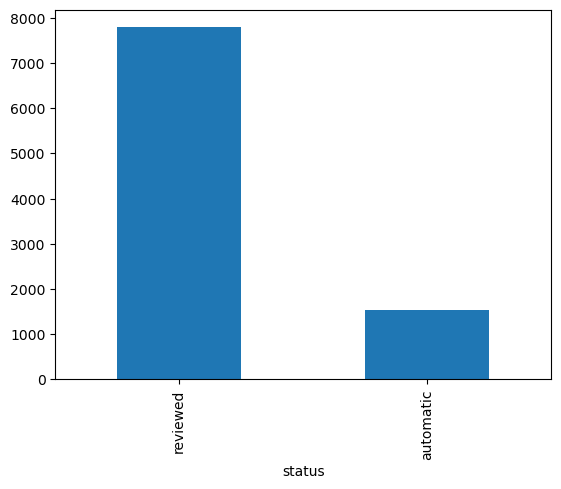

In [42]:
# Bar chart of value counts
df.value_counts('status').plot(kind='bar');

In [ ]:
# Alternative dot-notation: df.plot.hist(), df.plot.scatter(), etc.
df.plot.hist(y='mag');

### `df.plot()` quick reference

| Plot type | `kind=` argument | Alternative notation |
|---|---|---|
| Histogram | `'hist'` | `df.plot.hist(y='col')` |
| Line plot | `'line'` | `df.plot.line(x='col', y='col')` |
| Scatter plot | `'scatter'` | `df.plot.scatter(x='col', y='col')` |
| Bar chart | `'bar'` | `df.plot.bar()` |
| Horizontal bar | `'barh'` | `df.plot.barh()` |
| Box plot | `'box'` | `df.plot.box()` |

---
## 8. Putting It All Together

Practice combining filtering, arithmetic, and plotting in one workflow.

### **Q1.** Use the `CA_df`, the subsetted DataFrame with only Californian earthquakes.

The summary table will have two rows and 2 columns.

The columns should be `mag` and `place`.

The first row should contain the information for the **smallest** earthquake in California (lowest magnitude) and the second row should contain information for the **largest earthquake** in California.

In [ ]:
# Q1
CA_df.loc[
    [CA_df.mag.idxmin(), CA_df.mag.idxmax()],
    ['mag','place']
]

#### More hints

Use `.loc` to reference and subset the columns `mag` and `place`

Since you are using `.loc`, to find the min and max, you want to use the row names, not the index position value!

- `df.colname.idxmin()`
- `df.colname.idxmax()`

### **Q2.** How many earthquakes in the dataset had a **red alert**?

In [ ]:
# Q2
df.alert.value_counts()

#df.alert.value_counts()['red']

### **Q3.** How many **Oregon** earthquakes are in the dataset?

In [ ]:
# Q3
df.loc[df.place.str.contains('OR|Oregon', regex=True)].shape

### **Q4.** Make a histogram of earthquake magnitude for California only. Use `df.plot()`.

In [ ]:
# Q4
CA_df.mag.plot.hist()